# Project: Analysis of performance for Italian soccer teams 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The purpose of this work is to analyse the performance from 2008/2009 to 2015/2016 season for three main Italian football teams: _F.C. Internazionale_ , _A.C. Milan_ , and _Juventus_.<br>
All the data has been collected and organized from _Kaggle - Soccer Database_ . The Dataset contains data for soccer matches, players, and teams from European Countries from 2008 to 2016.<br> 
This report will explore the results, points, and differences between these teams. With the final aim to answer these questions:
- What were the average collected points per match per each season from these teams? 
- What factors influence more the result at the end of the season: to score more goals? to take fewer of them? or to have a balance between attack and defense? 
-  Are the supporters a good motivation to perform better or the pressure on playing at home had an opposite impact on these teams? 

In [64]:
# Importing all the necessary libraries 

import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('dark')
import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

In this section, I will import the full Dataset and show the different tables from which my data is collected.  

In [65]:
conn = sqlite3.connect("database.sqlite")

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


The Dataset has a massive amount of information and, to be more efficient, all the initial **data will be extracted using SQL** thought Jupyter Notebook.<br>
The next steps are to extract the data for each team we want to analyze and save them into variables.  

In [66]:
inter = pd.read_sql("""SELECT l.name as league_name, season, stage, m.date, 
           home_team_api_id as home_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = home_team_api_id) home_team,
           away_team_api_id as away_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = away_team_api_id) away_team,
           home_team_goal, away_team_goal
           FROM Match as m
           JOIN League as l
           ON m.league_id = l.id
           JOIN Team as t
           ON m.home_team_api_id = t.team_api_id
           WHERE (league_id IS 10257) AND (home_team_api_id == 8636 OR away_team_api_id == 8636)
           ORDER BY date ;""", conn)

In [67]:
print("A glance of the F.C. Internazionale data:")
inter.head()

A glance of the F.C. Internazionale data:


,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal
0,Italy Serie A,2008/2009,1,2008-08-30 00:00:00,9882,Sampdoria,8636,Inter,1,1
1,Italy Serie A,2008/2009,2,2008-09-13 00:00:00,8636,Inter,8530,Catania,2,1
2,Italy Serie A,2008/2009,3,2008-09-21 00:00:00,9804,Torino,8636,Inter,1,3
3,Italy Serie A,2008/2009,4,2008-09-24 00:00:00,8636,Inter,9888,Lecce,1,0
4,Italy Serie A,2008/2009,5,2008-09-28 00:00:00,8564,Milan,8636,Inter,1,0


In [68]:
print("The Inter Dataset has {rows} rows and {columns} columns".format( rows=inter.shape[0], columns=inter.shape[1]))

The Inter Dataset has 303 rows and 10 columns


In [69]:
print("Displaying Columns names, Null values and data type: \n")
inter.info()

Displaying Columns names, Null values and data type: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league_name     303 non-null    object
 1   season          303 non-null    object
 2   stage           303 non-null    int64 
 3   date            303 non-null    object
 4   home_team_id    303 non-null    int64 
 5   home_team       303 non-null    object
 6   away_team_id    303 non-null    int64 
 7   away_team       303 non-null    object
 8   home_team_goal  303 non-null    int64 
 9   away_team_goal  303 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.8+ KB


In [70]:
milan = pd.read_sql("""SELECT l.name as league_name, season, stage, m.date, 
           home_team_api_id as home_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = home_team_api_id) home_team,
           away_team_api_id as away_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = away_team_api_id) away_team,
           home_team_goal, away_team_goal
           FROM Match as m
           JOIN League as l
           ON m.league_id = l.id
           JOIN Team as t
           ON m.home_team_api_id = t.team_api_id
           WHERE (home_team_api_id == 8564 OR away_team_api_id == 8564)
           ORDER BY date ;""", conn)

In [71]:
print("A glance of the A.C Milan data:")
milan.head()

A glance of the A.C Milan data:


,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal
0,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,8564,Milan,9857,Bologna,1,2
1,Italy Serie A,2008/2009,2,2008-09-14 00:00:00,10233,Genoa,8564,Milan,2,0
2,Italy Serie A,2008/2009,3,2008-09-21 00:00:00,8564,Milan,8543,Lazio,4,1
3,Italy Serie A,2008/2009,4,2008-09-24 00:00:00,8690,Reggio Calabria,8564,Milan,1,2
4,Italy Serie A,2008/2009,5,2008-09-28 00:00:00,8564,Milan,8636,Inter,1,0


In [72]:
print("The Milan Dataset has {rows} rows and {columns} columns".format( rows=milan.shape[0], columns=milan.shape[1]))

The Milan Dataset has 303 rows and 10 columns


In [73]:
milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league_name     303 non-null    object
 1   season          303 non-null    object
 2   stage           303 non-null    int64 
 3   date            303 non-null    object
 4   home_team_id    303 non-null    int64 
 5   home_team       303 non-null    object
 6   away_team_id    303 non-null    int64 
 7   away_team       303 non-null    object
 8   home_team_goal  303 non-null    int64 
 9   away_team_goal  303 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.8+ KB


In [74]:
juventus = pd.read_sql("""SELECT l.name as league_name, season, stage, m.date, 
           home_team_api_id as home_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = home_team_api_id) home_team,
           away_team_api_id as away_team_id, (SELECT team_long_name FROM Team WHERE team_api_id = away_team_api_id) away_team,
           home_team_goal, away_team_goal
           FROM Match as m
           JOIN League as l
           ON m.league_id = l.id
           JOIN Team as t
           ON m.home_team_api_id = t.team_api_id
           WHERE (home_team_api_id == 9885 OR away_team_api_id == 9885) 
           ORDER BY date ;""", conn)

In [75]:
print("A glance of the Juventus data:")
juventus.head()

A glance of the Juventus data:


,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal
0,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,8535,Fiorentina,9885,Juventus,1,1
1,Italy Serie A,2008/2009,2,2008-09-14 00:00:00,9885,Juventus,8600,Udinese,1,0
2,Italy Serie A,2008/2009,3,2008-09-21 00:00:00,8529,Cagliari,9885,Juventus,0,1
3,Italy Serie A,2008/2009,4,2008-09-24 00:00:00,9885,Juventus,8530,Catania,1,1
4,Italy Serie A,2008/2009,5,2008-09-27 00:00:00,9882,Sampdoria,9885,Juventus,0,0


In [76]:
print("The Juventus Dataset has {rows} rows and {columns} columns".format(rows=juventus.shape[0], columns=juventus.shape[1]))

The Juventus Dataset has 301 rows and 10 columns


In [77]:
juventus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   league_name     301 non-null    object
 1   season          301 non-null    object
 2   stage           301 non-null    int64 
 3   date            301 non-null    object
 4   home_team_id    301 non-null    int64 
 5   home_team       301 non-null    object
 6   away_team_id    301 non-null    int64 
 7   away_team       301 non-null    object
 8   home_team_goal  301 non-null    int64 
 9   away_team_goal  301 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.6+ KB


### Football teams data cleaning and prepraring for the analysis:
#### Assessing the data:
- Column "date" in inter, milan and juventus table has not the right data type (datetime).
- Since there are 38 matches per season. And there are 8 seasons to analyse I was expecting 304 total rows from each dataset.

#### Data Cleaning 
- Changing format of "date" column into datetime format.
- Use Groupby per season to furhter investigate missing rows. Eventually add them or assess differently. 

In [78]:
# Create a copy of the original dateset to work in 

inter_new = inter.copy()
milan_new = milan.copy()
juventus_new = juventus.copy()

# Datasets date column into dateformat YYYY/MM/DD:

inter_new['date'] =  pd.to_datetime(inter_new['date'])
milan_new["date"] = pd.to_datetime(milan_new["date"])
juventus_new["date"] = pd.to_datetime(juventus_new["date"])

In [79]:
inter_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   league_name     303 non-null    object        
 1   season          303 non-null    object        
 2   stage           303 non-null    int64         
 3   date            303 non-null    datetime64[ns]
 4   home_team_id    303 non-null    int64         
 5   home_team       303 non-null    object        
 6   away_team_id    303 non-null    int64         
 7   away_team       303 non-null    object        
 8   home_team_goal  303 non-null    int64         
 9   away_team_goal  303 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 23.8+ KB


In [80]:
milan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   league_name     303 non-null    object        
 1   season          303 non-null    object        
 2   stage           303 non-null    int64         
 3   date            303 non-null    datetime64[ns]
 4   home_team_id    303 non-null    int64         
 5   home_team       303 non-null    object        
 6   away_team_id    303 non-null    int64         
 7   away_team       303 non-null    object        
 8   home_team_goal  303 non-null    int64         
 9   away_team_goal  303 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 23.8+ KB


In [81]:
juventus_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   league_name     301 non-null    object        
 1   season          301 non-null    object        
 2   stage           301 non-null    int64         
 3   date            301 non-null    datetime64[ns]
 4   home_team_id    301 non-null    int64         
 5   home_team       301 non-null    object        
 6   away_team_id    301 non-null    int64         
 7   away_team       301 non-null    object        
 8   home_team_goal  301 non-null    int64         
 9   away_team_goal  301 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 23.6+ KB


In [82]:
# Use Groupby to further investigate missing rows for each datasets:

inter_new.groupby("season").size()

season
2008/2009    38
2009/2010    38
2010/2011    38
2011/2012    37
2012/2013    38
2013/2014    38
2014/2015    38
2015/2016    38
dtype: int64

In [83]:
milan_new.groupby("season").size()

season
2008/2009    38
2009/2010    38
2010/2011    38
2011/2012    37
2012/2013    38
2013/2014    38
2014/2015    38
2015/2016    38
dtype: int64

In [84]:
juventus_new.groupby("season").size()

season
2008/2009    38
2009/2010    38
2010/2011    38
2011/2012    35
2012/2013    38
2013/2014    38
2014/2015    38
2015/2016    38
dtype: int64

It seems there are some values (football matches) missing from each Dataset regarding the 2011/2012 season. The missing data can be added manually or programmatically by interrogating more databases. Although these actions will complete our datasets, it goes beyond the purpose of the project.<br>
For the reason above I will **carry on the exploration and analysis of data by skipping the 2011/2012 season** to be able to make a more accurate analysis on homogenous datasets .

In [85]:
inter_season1112 = inter_new[inter_new["season"]=="2011/2012"].index   # Indexing rows within the 2011/2012 season
inter_new.drop(inter_season1112,inplace=True)                          # Deleting those rows
inter_new.reset_index(inplace=True, drop=True)

milan_season1112 = milan_new[milan_new["season"]=="2011/2012"].index
milan_new.drop(milan_season1112,inplace=True)
milan_new.reset_index(inplace=True, drop=True)

juve_season1112 = juventus_new[juventus_new["season"]=="2011/2012"].index
juventus_new.drop(juve_season1112,inplace=True)
juventus_new.reset_index(inplace=True, drop=True)

In [86]:
print("The Inter Dataset has {rows} rows and {columns} columns".format(rows=inter_new.shape[0], columns=inter_new.shape[1]))
print("The Milan Dataset has {rows} rows and {columns} columns".format(rows=milan_new.shape[0], columns=milan_new.shape[1]))
print("The Juventus Dataset has {rows} rows and {columns} columns".format(rows=juventus_new.shape[0], columns=juventus_new.shape[1]))

The Inter Dataset has 266 rows and 10 columns
The Milan Dataset has 266 rows and 10 columns
The Juventus Dataset has 266 rows and 10 columns


As expected the number of rows decrease due to the cancellation of the season 2011/2012

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1: What were the average collected points per match per each season from these teams?
**a.** To be able to fully answer the question above I will need to add some extra columns to the teams datasets in order to display the result and number of points per match. 

In [87]:
win, draw, lost = "win", "draw", "lost"
pt_win, pt_draw, pt_lost = 3, 1, 0 

In [88]:
result, total_pts  = [],[]

for i in range(inter_new.shape[0]):
    if (inter_new.home_team[i] == "Inter") & (inter_new.home_team_goal[i] > inter_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (inter_new.away_team[i] == "Inter") & (inter_new.home_team_goal[i] < inter_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (inter_new.home_team[i] == "Inter") & (inter_new.home_team_goal[i] < inter_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    elif (inter_new.away_team[i] == "Inter") & (inter_new.home_team_goal[i] > inter_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    else: 
        result.append(draw)
        total_pts.append(pt_draw)

inter_results = pd.Series(result)
inter_total_pts = pd.Series(total_pts)

inter_new["result"] = inter_results
inter_new["total_points"] = inter_total_pts

In [89]:
inter_new.head(3)

,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal,result,total_points
0,Italy Serie A,2008/2009,1,2008-08-30,9882,Sampdoria,8636,Inter,1,1,draw,1
1,Italy Serie A,2008/2009,2,2008-09-13,8636,Inter,8530,Catania,2,1,win,3
2,Italy Serie A,2008/2009,3,2008-09-21,9804,Torino,8636,Inter,1,3,win,3


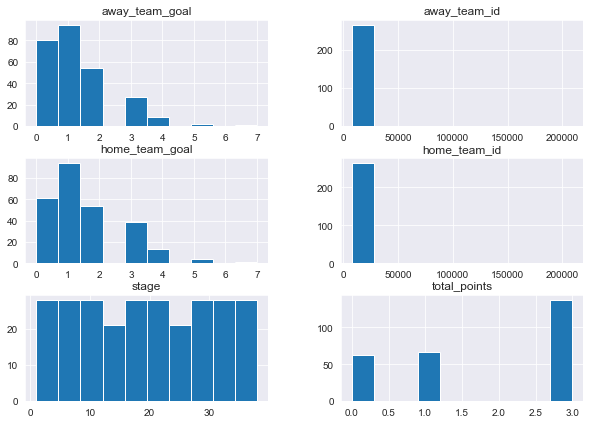

In [90]:
inter_new.hist(figsize = [10, 7]);

> - By having a quick look at the histograms we can see that in many of the matches where F.C. Internazionale was playing at home the final result was with at least one goal.
- Performance for F.C. Internazionale away is not as good as at home, we can see most of the matches ended up with zero or one goal. 
- A summarize of a great number of victories is given from the last plot, with Internazionale collecting 3 points per match. At the end of the day is what we expect from a big team. 

In [91]:
result, total_pts  = [],[]

for i in range(milan_new.shape[0]):
    if (milan_new.home_team[i] == "Milan") & (milan_new.home_team_goal[i] > milan_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (milan_new.away_team[i] == "Milan") & (milan_new.home_team_goal[i] < milan_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (milan_new.home_team[i] == "Milan") & (milan_new.home_team_goal[i] < milan_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    elif (milan_new.away_team[i] == "Milan") & (milan_new.home_team_goal[i] > milan_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    else: 
        result.append(draw)
        total_pts.append(pt_draw)

milan_results = pd.Series(result)
milan_total_pts = pd.Series(total_pts)

milan_new["result"] = milan_results
milan_new["total_points"] = milan_total_pts

In [92]:
milan_new.head(3)

,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal,result,total_points
0,Italy Serie A,2008/2009,1,2008-08-31,8564,Milan,9857,Bologna,1,2,lost,0
1,Italy Serie A,2008/2009,2,2008-09-14,10233,Genoa,8564,Milan,2,0,lost,0
2,Italy Serie A,2008/2009,3,2008-09-21,8564,Milan,8543,Lazio,4,1,win,3


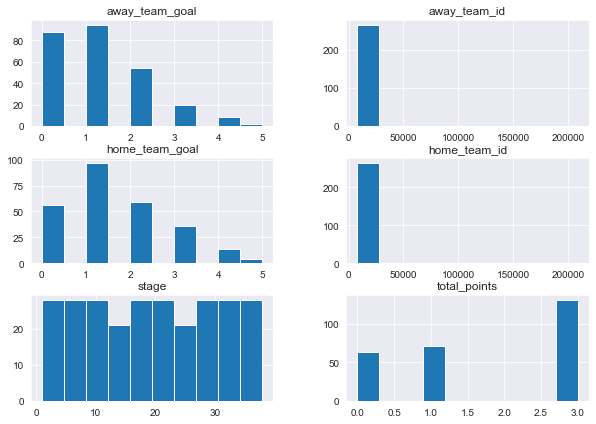

In [93]:
milan_new.hist(figsize = [10, 7]);

> - A quick view for A.C. Milan suggest they were performing slighty better at home than away, with more matches having at leats one goal. 
- As for Internazionale a  summarize of a great number of victories is given from the last plot (taking the total 3 points per match).

In [94]:
result, total_pts  = [],[]

for i in range(juventus_new.shape[0]):
    if (juventus_new.home_team[i] == "Juventus") & (juventus_new.home_team_goal[i] > juventus_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (juventus_new.away_team[i] == "Juventus") & (juventus_new.home_team_goal[i] < juventus_new.away_team_goal[i]):
        result.append(win)
        total_pts.append(pt_win)
    elif (juventus_new.home_team[i] == "Juventus") & (juventus_new.home_team_goal[i] < juventus_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    elif (juventus_new.away_team[i] == "Juventus") & (juventus_new.home_team_goal[i] > juventus_new.away_team_goal[i]):
        result.append(lost)
        total_pts.append(pt_lost)
    else: 
        result.append(draw)
        total_pts.append(pt_draw)

juventus_results = pd.Series(result)
juventus_total_pts = pd.Series(total_pts)

juventus_new["result"] = juventus_results
juventus_new["total_points"] = juventus_total_pts

In [95]:
juventus_new.head(3)

,league_name,season,stage,date,home_team_id,home_team,away_team_id,away_team,home_team_goal,away_team_goal,result,total_points
0,Italy Serie A,2008/2009,1,2008-08-31,8535,Fiorentina,9885,Juventus,1,1,draw,1
1,Italy Serie A,2008/2009,2,2008-09-14,9885,Juventus,8600,Udinese,1,0,win,3
2,Italy Serie A,2008/2009,3,2008-09-21,8529,Cagliari,9885,Juventus,0,1,win,3


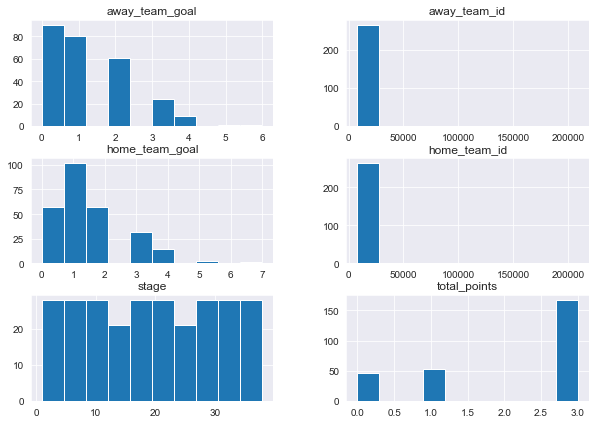

In [96]:
juventus_new.hist(figsize = [10, 7]);

> - A major number of total victories is given for Juventus. Different than the previous two teams. here we see the number of matches where they took 3 points is many more.

**b.** Once we have all the information regarding points per match in each season, I am able to do some statistics to summarize the average number of points. 

In [97]:
inter_avg_pts = inter_new.groupby("season")["total_points"].mean().reset_index()
milan_avg_pts = milan_new.groupby("season")["total_points"].mean().reset_index()
juventus_avg_pts = juventus_new.groupby("season")["total_points"].mean().reset_index()

In [98]:
inter_avg_pts

,season,total_points
0,2008/2009,2.210526
1,2009/2010,2.157895
2,2010/2011,2.000000
3,2012/2013,1.421053
4,2013/2014,1.578947
5,2014/2015,1.447368
6,2015/2016,1.763158


In [99]:
milan_avg_pts

,season,total_points
0,2008/2009,1.947368
1,2009/2010,1.842105
2,2010/2011,2.157895
3,2012/2013,1.894737
4,2013/2014,1.500000
5,2014/2015,1.368421
6,2015/2016,1.500000


In [100]:
juventus_avg_pts

,season,total_points
0,2008/2009,1.947368
1,2009/2010,1.447368
2,2010/2011,1.526316
3,2012/2013,2.289474
4,2013/2014,2.684211
5,2014/2015,2.289474
6,2015/2016,2.394737


**c.** Plotting the _average points per match during each season_ datasets for each team. And make a comparison 

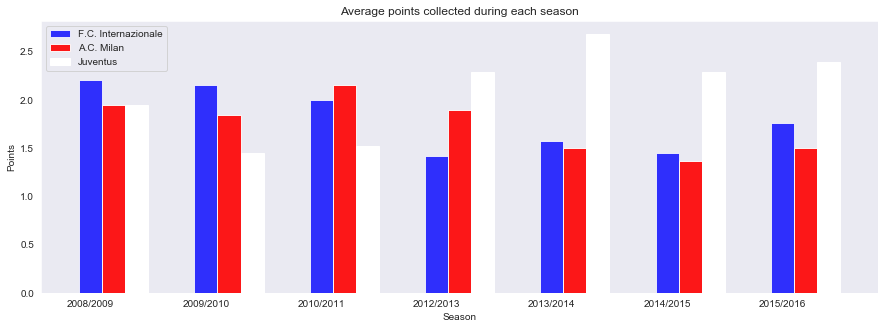

In [101]:
ind = np.arange(len(inter_avg_pts))
width = 0.2

plt.figure(figsize=(15,5));

I=plt.bar(data = inter_avg_pts, x=ind, height="total_points", color='b', alpha=0.8, width=0.2, label = "F.C. Internazionale")
M=plt.bar(data = milan_avg_pts, x=ind+width, height="total_points", color='r', alpha =0.9, width=0.2, label = "A.C. Milan")
J=plt.bar(data = juventus_avg_pts, x=ind+(width*2), height="total_points", color='w', width=0.2, label = "Juventus")

plt.title("Average points collected during each season")
plt.xlabel("Season")
plt.ylabel("Points")
plt.xticks(inter_avg_pts.season.index, inter_avg_pts.season.values)
plt.legend();

> - We can see F.C. Internazionale had their best seasons from 2008 to 2010 with an average of more than 2 points (out of 3) per match. 
- A.C. Milan instead had their best season only during 2010/2011 collecting more than 2 points (out of 3) per match. With a decrescent performance after this year.
- There is a formidable ascent in performance for Juventus starting from 2012 and beyond. To notice the peak they had during the 2013/2014 season with 2.7 points (out of 3) per match during the whole season, that means they have dominated the league. Plus, it is the only team that had an crescent positive performance than the others from 2011 to 2016. 

### Question 2: What factors influence more the result at the end of the season: to score more goals or to take fewer of them? Is the Goal Difference a good indicator of performance?
**a.** To answer this question I need to interrogate the full Soccer database again, but this time taking information about the _total number of goals_ each team made during each season, the _total number of goals each team had against_ , and calculate the _goal difference_.<br>
The three variables mentioned above are a good indicator of the strength of each team attack, defense, and balance between attack and defense. <br>
Finally, compared the _goal Difference_ indicator with the total number of points per season to have a better understanding of how these teams performance <br><br>
**Note:** Due to homogeneity reasons explained in point 1, the 2011/2012 season will still be skipped and not analyzed.  

In [102]:
home_goals = pd.read_sql("""SELECT season, (SELECT team_long_name FROM Team WHERE team_api_id = home_team_api_id) as team, 
sum(home_team_goal) as total_home_goals
FROM Match as m
WHERE (home_team_api_id == 8636 AND season != "2011/2012") OR 
      (home_team_api_id == 9885 AND season != "2011/2012") OR 
      (home_team_api_id == 8564 AND season != "2011/2012")
GROUP BY season, home_team_api_id
ORDER BY home_team_api_id, date ;""", conn)

away_goals = pd.read_sql("""SELECT season, (SELECT team_long_name FROM Team WHERE team_api_id = away_team_api_id) as team, 
sum(away_team_goal) as total_away_goals
FROM Match as m
WHERE (away_team_api_id == 8636 AND season != "2011/2012") OR 
      (away_team_api_id == 9885 AND season != "2011/2012") OR 
      (away_team_api_id == 8564 AND season != "2011/2012")
GROUP BY season, away_team_api_id
ORDER BY away_team_api_id, date;""", conn)

goals_from_away = pd.read_sql("""SELECT season, (SELECT team_long_name FROM Team WHERE team_api_id = home_team_api_id) as team, 
sum(away_team_goal) as goals_from_away_team
FROM Match as m
WHERE (home_team_api_id == 8636 AND season != "2011/2012") OR 
      (home_team_api_id == 9885 AND season != "2011/2012") OR 
      (home_team_api_id == 8564 AND season != "2011/2012")
GROUP BY season, home_team_api_id
ORDER BY home_team_api_id, date;""", conn)

goals_from_home = pd.read_sql("""SELECT season, (SELECT team_long_name FROM Team WHERE team_api_id = away_team_api_id) as team, 
sum(home_team_goal) as goals_from_home_team
FROM Match as m
WHERE (away_team_api_id == 8636 AND season != "2011/2012") OR 
      (away_team_api_id == 9885 AND season != "2011/2012") OR 
      (away_team_api_id == 8564 AND season != "2011/2012")
GROUP BY season, away_team_api_id
ORDER BY away_team_api_id, date;""", conn)

**b.** Create and join all the tables to have an overall point of view for each team during each season:

In [103]:
home_goals["total_goals_scores"] = home_goals["total_home_goals"] + away_goals["total_away_goals"]
home_goals["total_goals_against"] = goals_from_away["goals_from_away_team"] + goals_from_home["goals_from_home_team"]
home_goals["goal_difference"] = home_goals["total_goals_scores"] - home_goals["total_goals_against"]
home_goals.drop(columns=["total_home_goals"], inplace=True)

home_goals

,season,team,total_goals_scores,total_goals_against,goal_difference
0,2008/2009,Milan,70,35,35
1,2009/2010,Milan,60,39,21
2,2010/2011,Milan,65,24,41
3,2012/2013,Milan,67,39,28
4,2013/2014,Milan,57,49,8
5,2014/2015,Milan,56,50,6
6,2015/2016,Milan,49,43,6
7,2008/2009,Inter,70,32,38
8,2009/2010,Inter,75,34,41
9,2010/2011,Inter,69,42,27


**c.** Split the above dataset for each team and add a _total_point_ column

In [104]:
milan_gd = home_goals.iloc[:7]                                        # split row from 0 to 7 excluded
m = milan_new.groupby("season")["total_points"].sum().reset_index()   # generate and take total_point column from milan_new
milan_gd["total_points"] = m["total_points"].values                   # add total_point column to milan_gd Dataset
milan_gd

,season,team,total_goals_scores,total_goals_against,goal_difference,total_points
0,2008/2009,Milan,70,35,35,74
1,2009/2010,Milan,60,39,21,70
2,2010/2011,Milan,65,24,41,82
3,2012/2013,Milan,67,39,28,72
4,2013/2014,Milan,57,49,8,57
5,2014/2015,Milan,56,50,6,52
6,2015/2016,Milan,49,43,6,57


In [105]:
inter_gd = home_goals.iloc[7:14]
i = inter_new.groupby("season")["total_points"].sum().reset_index()
inter_gd["total_points"] = i["total_points"].values
inter_gd

,season,team,total_goals_scores,total_goals_against,goal_difference,total_points
7,2008/2009,Inter,70,32,38,84
8,2009/2010,Inter,75,34,41,82
9,2010/2011,Inter,69,42,27,76
10,2012/2013,Inter,55,57,-2,54
11,2013/2014,Inter,62,39,23,60
12,2014/2015,Inter,59,48,11,55
13,2015/2016,Inter,50,38,12,67


In [106]:
juve_gd = home_goals.iloc[14:]
j = juventus_new.groupby("season")["total_points"].sum().reset_index() 
juve_gd["total_points"] = j["total_points"].values
juve_gd

,season,team,total_goals_scores,total_goals_against,goal_difference,total_points
14,2008/2009,Juventus,69,37,32,74
15,2009/2010,Juventus,55,56,-1,55
16,2010/2011,Juventus,57,47,10,58
17,2012/2013,Juventus,71,24,47,87
18,2013/2014,Juventus,80,23,57,102
19,2014/2015,Juventus,72,24,48,87
20,2015/2016,Juventus,75,20,55,91


**d.** Plot the findings for each team

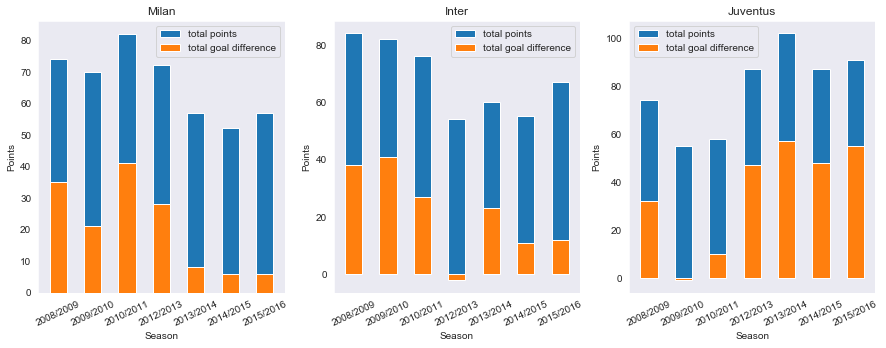

In [116]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 3, 1)

a = plt.bar(data = milan_gd, x= "season", height="total_points", width=0.5, label = "total points")
b = plt.bar(data = milan_gd, x= "season", height="goal_difference", width=0.5, label = "total goal difference")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("Milan")
plt.legend();

plt.subplot(1, 3, 2)
a = plt.bar(data = inter_gd, x= "season", height="total_points", width=0.5, label = "total points")
b = plt.bar(data = inter_gd, x= "season", height="goal_difference", width=0.5, label = "total goal difference")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("Inter")
plt.legend();

plt.subplot(1, 3, 3)
a = plt.bar(data = juve_gd, x= "season", height="total_points", width=0.5, label = "total points")
b = plt.bar(data = juve_gd, x= "season", height="goal_difference", width=0.5, label = "total goal difference")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Points")
plt.title("Juventus")

plt.legend();

> - Above is shown how the level of total points increase when total goal-difference increase. 
- A.C. Milan shows a good level of performance during the first four seasons, with a strong decrease in the last three.
- F.C. Internazionale shows a clear decrease in performance after 2010, with the worst season in 2012 having a negative goal-difference (which means they had more goals against). A clear problem in attack and defense. 
- Same as F.C. Internazionale but in 2009, Juventus had a bad season that year. 
- Nonetheless, we can see how Juventus found a perfect balance between attack and defense after 2011. Consequently, they were able to gain more points at the end of the last four seasons.

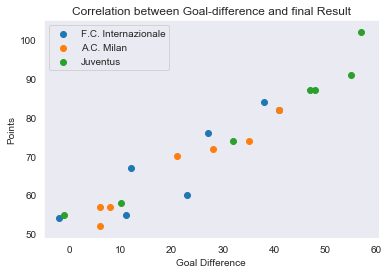

In [109]:
plt.scatter(inter_gd["goal_difference"], inter_gd["total_points"], label = "F.C. Internazionale")
plt.scatter(milan_gd["goal_difference"], milan_gd["total_points"], label = "A.C. Milan")
plt.scatter(juve_gd["goal_difference"], juve_gd["total_points"], label = "Juventus")
plt.xlabel("Goal Difference")
plt.ylabel("Points")
plt.title("Correlation between Goal-difference and final Result")
plt.legend();

> - The scatterplot shows a strong positive correlation between the final total points and goal-difference. It means how important is to find a good balance between goals scored and those against. 
- Each team shows how they were able to gain more points when the goal difference was high. It means each team was scoring goals avoiding taking many or simply that the defense was able to avoid losses.

### Question 3: Are the supporters a good motivation to perform better or the pressure on playing at home had an opposite impact on these teams?
**a.** To be able to answer this question I will count the number of victories for each each team either when they play at home either away.<br>
**Note:** Due to homogeneity reasons explained in point 1, the 2011/2012 season will still be skipped and not analyzed.

In [110]:
print("F.C. Internazionale victories:")

Inter_H = inter_new[(inter_new["home_team"] == "Inter") & (inter_new["result"] == "win")] # Gather number of home victories
Inter_A = inter_new[(inter_new["away_team"] == "Inter") & (inter_new["result"] == "win")] # Gather number of away victories

Inter_winH = Inter_H.groupby(["season", "result"]).size().reset_index(name="victory_home")
Inter_winA = Inter_A.groupby(["season", "result"]).size().reset_index(name="victory_away")

Inter_winH["victory_away"] = Inter_winA["victory_away"]
Inter_winH.drop(columns="result")

F.C. Internazionale victories:


,season,victory_home,victory_away
0,2008/2009,14,11
1,2009/2010,15,9
2,2010/2011,15,8
3,2012/2013,8,8
4,2013/2014,8,7
5,2014/2015,7,7
6,2015/2016,13,7


In [111]:
print("A.C. Milan victories:")

Milan_H = milan_new[(milan_new["home_team"] == "Milan") & (milan_new["result"] == "win")]
Milan_A = milan_new[(milan_new["away_team"] == "Milan") & (milan_new["result"] == "win")]

Milan_winH = Milan_H.groupby(["season", "result"]).size().reset_index(name="victory_home")
Milan_winA = Milan_A.groupby(["season", "result"]).size().reset_index(name="victory_away")

Milan_winH["victory_away"] = Milan_winA["victory_away"]
Milan_winH.drop(columns="result")

A.C. Milan victories:


,season,victory_home,victory_away
0,2008/2009,14,8
1,2009/2010,12,8
2,2010/2011,13,11
3,2012/2013,13,8
4,2013/2014,11,5
5,2014/2015,9,4
6,2015/2016,9,6


In [112]:
print("Juventus victories:")

Juventus_H = juventus_new[(juventus_new["home_team"] == "Juventus") & (juventus_new["result"] == "win")]
Juventus_A = juventus_new[(juventus_new["away_team"] == "Juventus") & (juventus_new["result"] == "win")]

Juventus_winH = Juventus_H.groupby(["season", "result"]).size().reset_index(name="victory_home")
Juventus_winA = Juventus_A.groupby(["season", "result"]).size().reset_index(name="victory_away")

Juventus_winH["victory_away"] = Juventus_winA["victory_away"]
Juventus_winH.drop(columns="result")

Juventus victories:


,season,victory_home,victory_away
0,2008/2009,11,10
1,2009/2010,9,7
2,2010/2011,8,7
3,2012/2013,14,13
4,2013/2014,19,14
5,2014/2015,16,10
6,2015/2016,16,13


**b.** Plot the findings for each team

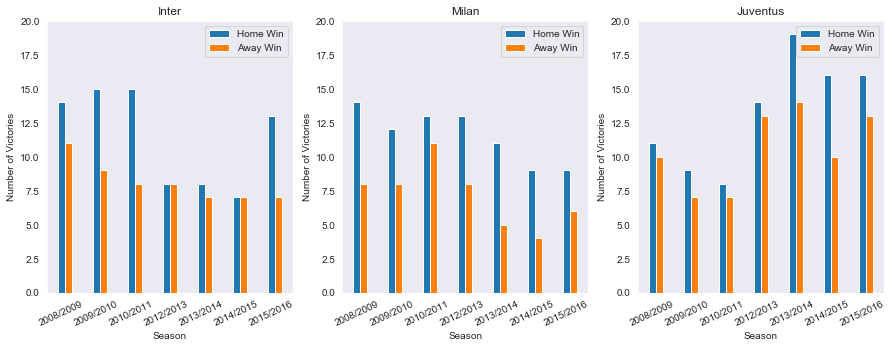

In [117]:
ind = np.arange(len(Inter_winH))

plt.figure(figsize = [15, 5])
low = 0
high = Juventus_winH.victory_home.max() + 1

plt.subplot(1, 3, 1)
plt.bar(data = Inter_winH, x= ind, height="victory_home", width=0.2, label = "Home Win")
plt.bar(data = Inter_winH, x= ind+0.2, height="victory_away", width=0.2, label = "Away Win")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Number of Victories")
plt.title("Inter")
plt.xticks(Inter_winH.season.index, Inter_winH.season.values)
plt.ylim(low, high)
plt.legend();

plt.subplot(1, 3, 2)
plt.bar(data = Milan_winH, x= ind, height="victory_home", width=0.2, label = "Home Win")
plt.bar(data = Milan_winH, x= ind+0.2, height="victory_away", width=0.2, label = "Away Win")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Number of Victories")
plt.title("Milan")
plt.xticks(Milan_winH.season.index, Milan_winH.season.values)
plt.ylim(low, high)
plt.legend();

plt.subplot(1, 3, 3)
plt.bar(data = Juventus_winH, x= ind, height="victory_home", width=0.2, label = "Home Win")
plt.bar(data = Juventus_winH, x= ind+0.2, height="victory_away", width=0.2, label = "Away Win")
plt.xticks(rotation = 25);
plt.xlabel("Season")
plt.ylabel("Number of Victories")
plt.title("Juventus")
plt.xticks(Juventus_winH.season.index, Juventus_winH.season.values)
plt.ylim(low, high)
plt.legend();

plt.legend();

> - The plots above show how important are the supporters for each team. In fact, these teams tend, with some exceptions, to win more often in front of their own fans. 
- We can see that F.C. Internazionale and A.C. Milan have won more at home during the first three seasons, after that A.C. Milan also improved their away victories.
- Juventus had a low number of victories either at home either away during the first three seasons, with a remarkable increment on these during and after 2012.

<a id='conclusions'></a>
## Conclusions

> Though this report I analysed the performance of F.C. Internazionale, A.C. Milan, and Juventus under different aspects.<br> 
A reminder of the exclusion of the 2011/2012 season is necessary.  **It has to be told that with some extra data the final conclusions may have changed**.<br>
The following conclusions are made taking into consideration seven seasons for these teams. As in any sport, some teams have good years and some no. Consequently, with a major number of matches and data, a more appropriate analysis could lead to what is the reality for these teams.<br>
Even though these teams spend millions of euros every year to buy new players, the victory and good performance is not assured.
There are many reasons why a specific team wins more often than others, and, by answering the above questions, I gave an idea of some points to look at when comparing performances: <br>
- The average number of points a team collect during the season per each match is a good starting point. More points mean more victories, which lead to think coach, attackers and defenders are playing well. Although the same analysis could have been done either from matches at home or away, the main results does not change.
- Some teams need more time than others to adjust new players and to learn some tactics that lead to victories. When a team find a good balance between the goals it scores and those against means the team and coach row in the same direction. And maybe that some players have reached the maximun potential.
- It is unusual for a team to bad perform in front of their supporters, but as we saw in point 3. some losses can lead to demotivation and, consequantly, more losses. Here we can see how a healthy company defend their own players and coach from media and speculations. At the end of the day football is also a mental game. 

_**Websites and references used during the development of the project:**_ <br>
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/doc/stable/user/index.html)
- [Stackoverflow](https://stackoverflow.com/)
- [Wikipedia](https://www.wikipedia.org/)
- [Udacity peer help & mentor help](https://knowledge.udacity.com/)